# Medical Insurance Charges (의료보험 비용)

Insurance Charges 데이터셋(Medical Cost Personal Dataset)은
개인의 나이, 성별, BMI, 흡연 여부, 가족 구성 등 기본 인구 통계 정보를 기반으로
의료 보험 비용(charges)이 어떻게 결정되는지를 분석하기 위해 수집된 자료

보험료 책정에 중요한 요인을 파악하는 연구나 헬스케어 분석 실습에서 널리 사용된다.

**건강·생활 요인이 보험 비용에 어떤 영향을 미치는지 분석.**

- `insurance.csv` 파일에 저장

| 컬럼명 | 설명 |
| --- | --- |
| `age` | 나이 (정책주체의 나이) |
| `sex` | 성별 (male / female) |
| `bmi` | 체질량지수 (Body Mass Index) |
| `children` | 자녀수 / 피보험자 부양가족 수 |
| `smoker` | 흡연 여부 (yes / no) |
| `region` | 거주 지역 (예: northeast, southeast, southwest, northwest) |
| `charges` | 보험 청구 비용 / 의료비용 (타겟 변수) |


### 1. 환경 설정 및 데이터 로드

In [3]:
# 먼저 필요한 라이브러리 불러오고, 데이터 로드

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시각화 설정 글씨 깨짐 방지 및 스타일 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자용 폰트 설정 (Mac/Linux는 다를 수 있음)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지
plt.style.use('seaborn-v0_8-darkgrid') # 시각화 스타일 설정

# 데이터 로드
df = pd.read_csv('../data/insurance.csv')

### 2. 데이터 기본 구조 및 결측치 확인

In [12]:
# 2.1 데이터 head 확인
print("---데이터셋 상위 5개의 행---")
print(df.head())

---데이터셋 상위 5개의 행---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [13]:
# 2.2 데이터 정보 (shape, Dtype 및 Non-null count) 확인
print(f"데이터셋 형태 : {df.shape}")
print("\n데이터셋 정보:")
df.info()

데이터셋 형태 : (1338, 7)

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 관찰 : 총 1338개의 데이터가 있으며, 결측치는 없는 것으로 확인됨.
- 데이터 타입 : age, chileren, charges는 숫자형(int/float) /// 나머지는 범주형(object)임.

In [14]:
# 2.3 범주형 변수의 고유값 확인
print("\n범주형 변수 고유값:")
for col in ['sex', 'smoker', 'region']:
    print(f"{col}: {df[col].unique()}")


범주형 변수 고유값:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


### 3. 기술 통계 분석(Descriptive Statistics)

In [15]:
# 수치형 변수들의 분포를 요약합니다.
print("\n수치형 변수 기술 통계:")
print(df.describe().T)


수치형 변수 기술 통계:
           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  


- ```charges``` (타겟변수) : 
    - 평균(13,270)과 표준편차(12110)을 비교했을때, 분산이 매우 크고 중앙값(9382)이 평균보다 현저히 낮아  
    -> 오른쪽으로 긴 분포임을 예측할 수 있다. 
    - 이는 고액 보험 청구 건이 일부 존재함을 알 수 있다.

### 4. 핵심 변수 분포 시각화

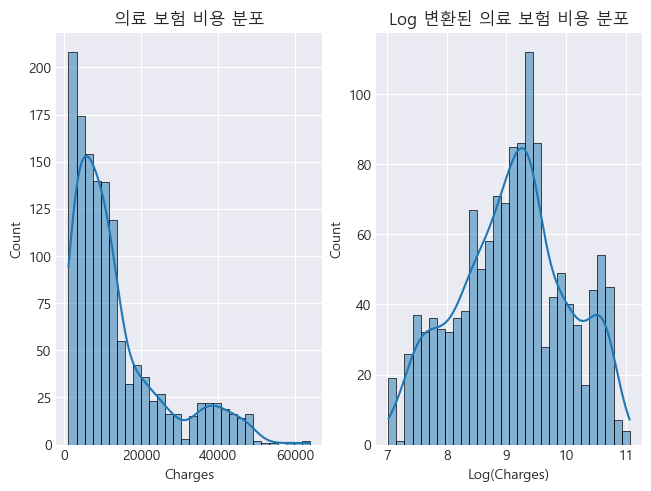

In [21]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

fig, (x1, x2) = plt.subplots(1,2, constrained_layout = True)

# 4.1 타겟변수 (charges) 분포 확인
sns.histplot(df['charges'], kde=True, bins=30, ax = x1)
x1.set_title('의료 보험 비용 분포')
x1.set_xlabel('Charges')


# 정규성 검토를 위한 log 변환 분포
df['log_charges'] = np.log(df['charges'])
sns.histplot(df['log_charges'], kde=True, bins=30, ax = x2)
x2.set_title('Log 변환된 의료 보험 비용 분포')
x2.set_xlabel('Log(Charges)')

plt.show()

- 관찰 : 예상대로 charges는 오른쪽으로 꼬리가 긴 비대칭 분포를 보인다. -> log 변환으로 정규 분포화 시키고자 함.

C:\Users\USER\AppData\Local\Temp\ipykernel_4440\1604678040.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


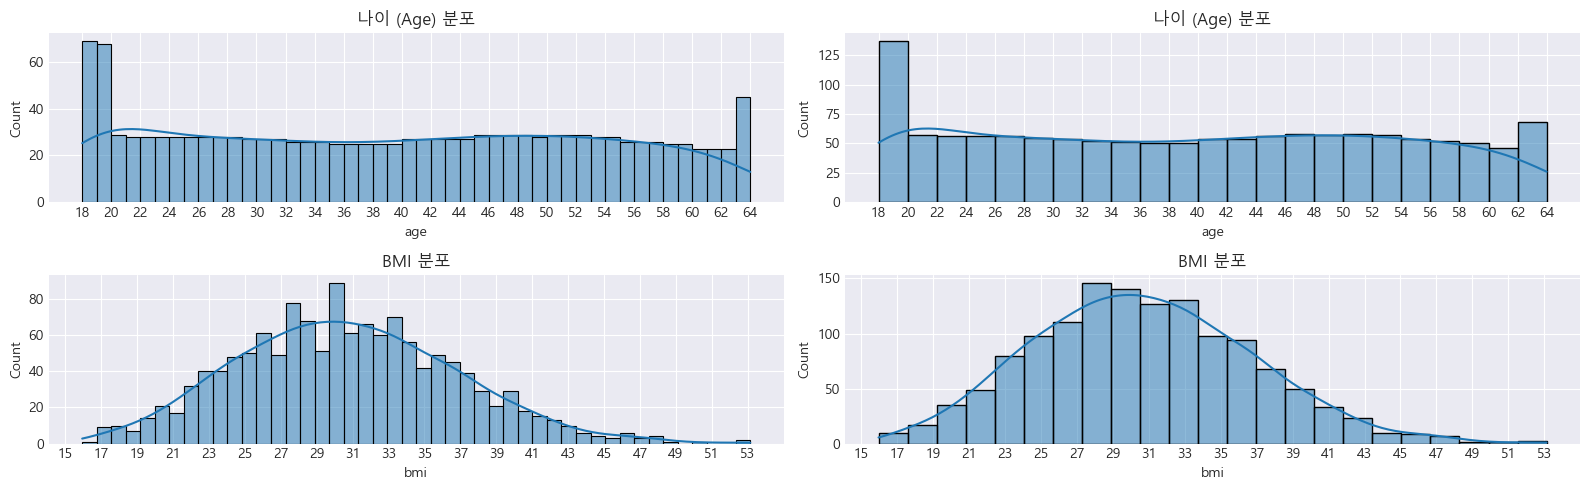

In [37]:
# 4.2 주요 수치형 변수(age, bmi) 분포 확인
fig, axes = plt.subplots(2,2 , figsize = (16,5), constrained_layout=True)

# 최대 64세에서 최소 18세 까지 46가지 나이의 수
sns.histplot(df['age'], kde=True, bins=46, ax=axes[0][0])
axes[0][0].set_title('나이 (Age) 분포')
axes[0][0].set_xticks(range(18,65,2))

# 최대 64세에서 최소 18세 까지 23가지 나이의 수
sns.histplot(df['age'], kde=True, bins=23, ax=axes[0][1])
axes[0][1].set_title('나이 (Age) 분포')
axes[0][1].set_xticks(range(18,65,2))


sns.histplot(df['bmi'], kde=True, bins=46, ax=axes[1][0])
axes[1][0].set_title('BMI 분포')
axes[1][0].set_xticks(range(15, 54, 2))

sns.histplot(df['bmi'], kde=True, bins=23, ax=axes[1][1])
axes[1][1].set_title('BMI 분포')
axes[1][1].set_xticks(range(15, 54, 2))

plt.tight_layout()
plt.show()

- age : 모든 연령대가 비교적 고르게 분포되어 있으며, 18세 청년층이 다소 많다.
- bmi : 분포가 비교적 정규분포에 가깝지만, 평균이 30.66으로 **과체중(30이상)**에 집중되어 있음을 보여줍니다.

### 이변량 분석 : 보험 비용에 영향을 미치는 요인 분석

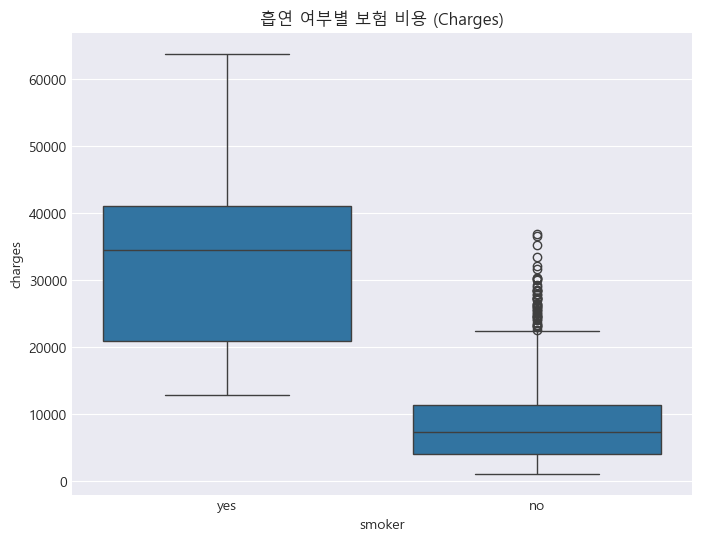


흡연 여부별 평균 보험료:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [38]:
# 5.1 흡연 여부와 보험 비용
# 흡연 여부는 보험 비용에 가장 큰 영향을 미치는 요인 중 하나로 예상되므로, 박스플롯으로 확인
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('흡연 여부별 보험 비용 (Charges)')
plt.show()

smoker_charges = df.groupby('smoker')['charges'].mean()
print("\n흡연 여부별 평균 보험료:")
print(smoker_charges)

- 핵심 : "흡연자(yes)"의 평균 보험료는 "비흡연자(no)"의 평균 보혐료보다 4배가량 높다.
    - smoker 변수가 charges를 예측하는데 있어 가장 중요한 특성일 것이다를 알 수 있음.

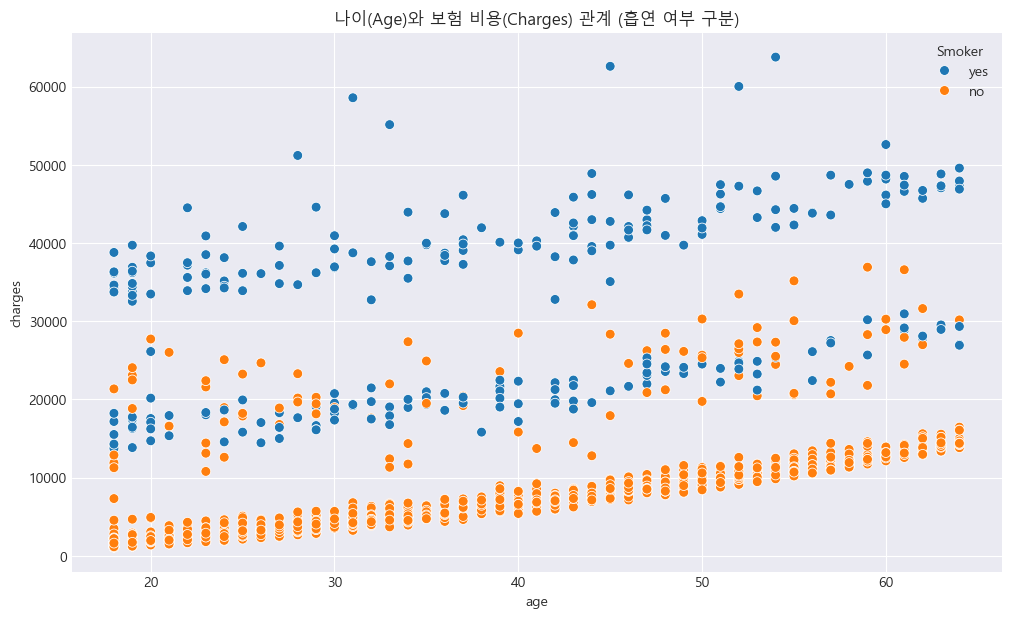

In [40]:
# 5.2 나이와 보험 비용
# 산점도를 확인하고, 흡연여부를 색으로 구분!

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', s=50)
plt.title('나이(Age)와 보험 비용(Charges) 관계 (흡연 여부 구분)')
plt.legend(title='Smoker')
plt.show()

- 관찰:
    - 비흡연자(파란색): 나이가 증가함에 따라 보험료가 완만하게 증가하는 선형적 관계를 보입니다.
    - 흡연자(주황색): 비흡연자보다 훨씬 높은 비용을 지불하며, 나이가 증가할수록 비용이 더 가파르게 증가하는 경향을 보입니다.

세 개의 뚜렷한 클러스터가 관찰되는데, 이는 나이, 흡연 여부 외에 또 다른 요인(예: BMI)이 복합적으로 작용할 가능성을 시사합니다.

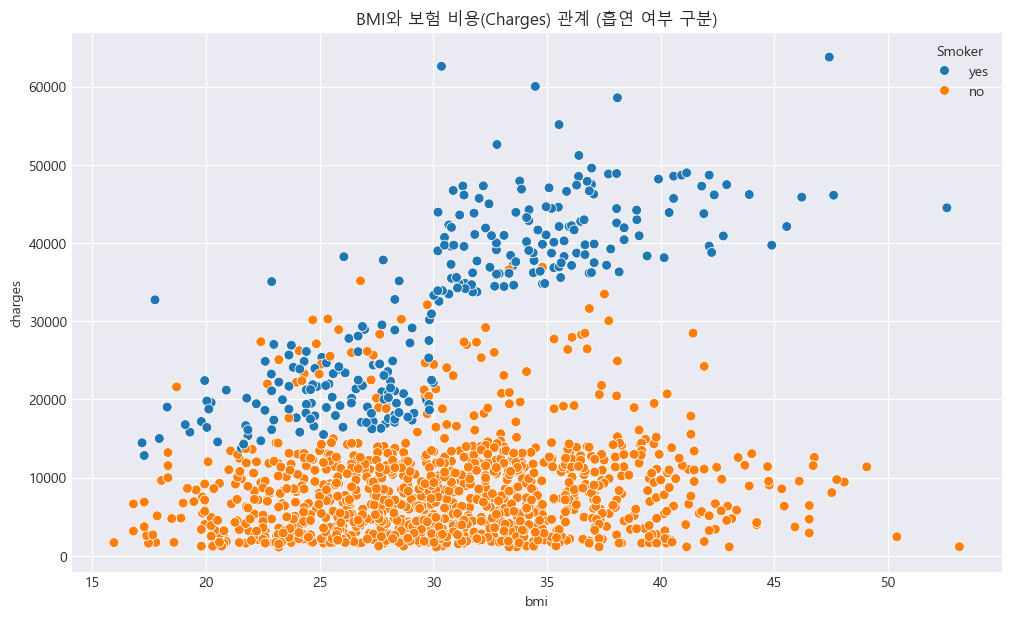

In [41]:
# 5.3 BMI와 보험비용
plt.figure(figsize=(12, 7))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, s=50)
plt.title('BMI와 보험 비용(Charges) 관계 (흡연 여부 구분)')
plt.legend(title='Smoker')
plt.show()

- 관찰:
    - 비흡연자: BMI와 보험료 간에 뚜렷한 선형 관계는 관찰되지 않으나, BMI가 30 이상인 그룹에서 높은 비용이 산발적으로 발생합니다.
    - 흡연자: BMI가 30 근처 또는 그 이상인 비만 흡연자 그룹에서 최고액의 보험료가 청구되는 경향이 관찰됩니다. 흡연자 내에서도 BMI가 높을수록 비용이 증가하는 경향이 있습니다.

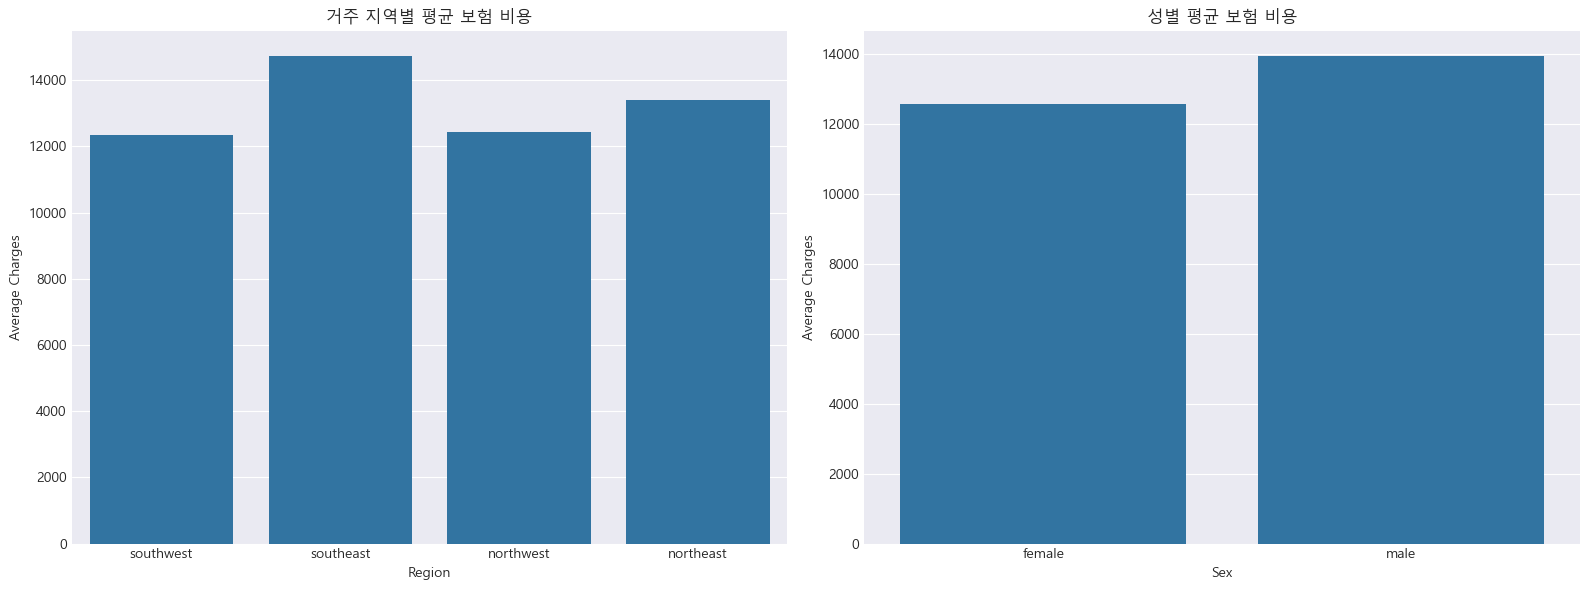

In [43]:
# 5.4 지역 및 성별 분석
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 지역별 비용
sns.barplot(x='region', y='charges', data=df, ax=axes[0], errorbar=None, estimator=np.mean)
axes[0].set_title('거주 지역별 평균 보험 비용')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Charges')

# 성별 비용
sns.barplot(x='sex', y='charges', data=df, ax=axes[1], errorbar=None, estimator=np.mean)
axes[1].set_title('성별 평균 보험 비용')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Average Charges')

plt.tight_layout()
plt.show()

### 6. 상관관계분석

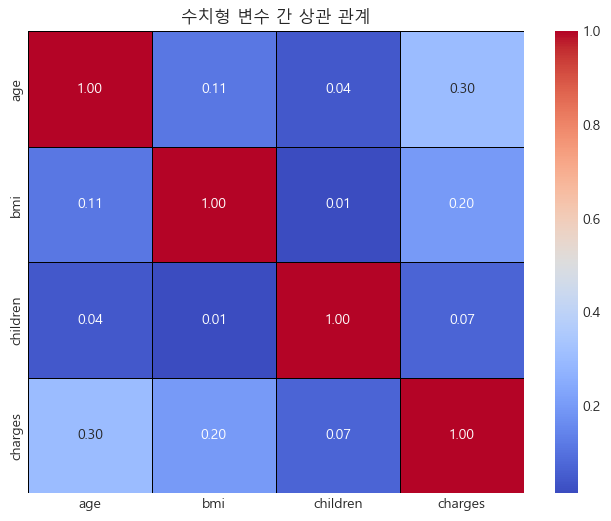

In [44]:
# 수치형 변수만 선택
corr_df = df[['age', 'bmi', 'children', 'charges']].copy()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black')
plt.title('수치형 변수 간 상관 관계')
plt.show()

유의미한 결과를 확인하지 못했습니다.

# 최종 EDA 요약 및 Insight

1. 압도적인 주요 요인: 흡연 (smoker)
    - 흡연 여부는 보험 비용을 결정하는 가장 강한 요인. 흡연자의 평균 보험료는 비흡연자의 약 4배입.

2. 나이 (age)의 선형 효과
    - 나이가 증가할수록 보험료가 증가하는 명확한 선형 관계. 특히, 나이와 흡연 여부가 결합될 때 보험료는 더욱 가파르게 상승합니다.

3. BMI와 위험군의 결합
    - BMI는 개별적으로는 약한 상관 관계를 가지지만, BMI가 높은 흡연자 그룹은 데이터셋에서 가장 높은 비용을 청구하는 고위험군 클러스터.

4. 데이터 분포의 비대칭성
    - 타겟 변수인 charges의 분포는 매우 오른쪽으로 치우쳐 있으므로, 정규성을 높이자~!